# Dependency Parsing

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/dependency](https://github.com/huseinzol05/Malaya/tree/master/example/dependency).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [4]:
%%time
import malaya

CPU times: user 4.98 s, sys: 944 ms, total: 5.92 s
Wall time: 6.56 s


### Describe supported dependencies

In [5]:
malaya.dependency.describe()

INFO:root:you can read more from https://universaldependencies.org/treebanks/id_pud/index.html


,Tag,Description
0,acl,clausal modifier of noun
1,advcl,adverbial clause modifier
2,advmod,adverbial modifier
3,amod,adjectival modifier
4,appos,appositional modifier
5,aux,auxiliary
6,case,case marking
7,ccomp,clausal complement
8,advmod,adverbial modifier
9,compound,compound


### List available transformer Dependency models

In [6]:
malaya.dependency.available_transformer()

INFO:root:tested on 20% test set.


,Size (MB),Quantized Size (MB),Arc Accuracy,Types Accuracy,Root Accuracy
bert,426.0,112.0,0.855,0.848,0.920
tiny-bert,59.5,15.7,0.718,0.694,0.886
albert,50.0,13.2,0.811,0.793,0.879
tiny-albert,24.8,6.6,0.708,0.673,0.817
xlnet,450.2,119.0,0.931,0.925,0.947
alxlnet,50.0,14.3,0.894,0.886,0.942


Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/models-accuracy.html#Dependency-parsing

**The best model in term of accuracy is XLNET**.

### Load xlnet dependency model

```python
def transformer(model: str = 'xlnet', quantized: bool = False, **kwargs):
    """
    Load Transformer Dependency Parsing model, transfer learning Transformer + biaffine attention.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'albert'`` - Google ALBERT BASE parameters.
        * ``'tiny-albert'`` - Google ALBERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
        * ``'alxlnet'`` - Malaya ALXLNET BASE parameters.
    
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result : Transformer class
    """
```

In [10]:
model = malaya.dependency.transformer(model = 'xlnet')

downloading frozen model to /Users/huseinzolkepli/Malaya/dependency/xlnet/model.pb


451MB [02:38, 2.84MB/s]                          


downloading frozen vocab to /Users/huseinzolkepli/Malaya/dependency/xlnet/sp10m.cased.v9.vocab


184%|██████████| 1.00/0.54 [00:00<00:00, 1.08MB/s]


downloading frozen tokenizer to /Users/huseinzolkepli/Malaya/dependency/xlnet/sp10m.cased.v9.model


135%|██████████| 1.00/0.74 [00:01<00:00, 1.04s/MB]
INFO:root:running dependency/xlnet using device /device:CPU:0


### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [11]:
quantized_model = malaya.dependency.transformer(model = 'xlnet', quantized = True)

INFO:root:running dependency/xlnet-quantized using device /device:CPU:0


### Predict

```python
def predict(self, string: str):
    """
    Tag a string.

    Parameters
    ----------
    string: str

    Returns
    -------
    result: Tuple
    """
```

In [12]:
string = 'Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar sekiranya mengantuk ketika memandu.'

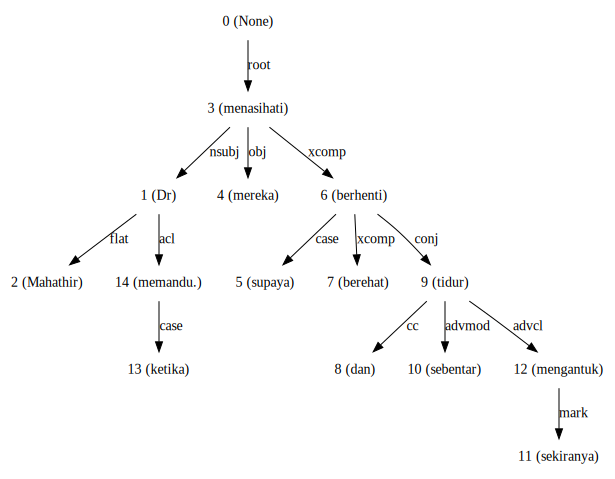

In [13]:
d_object, tagging, indexing = model.predict(string)
d_object.to_graphvis()

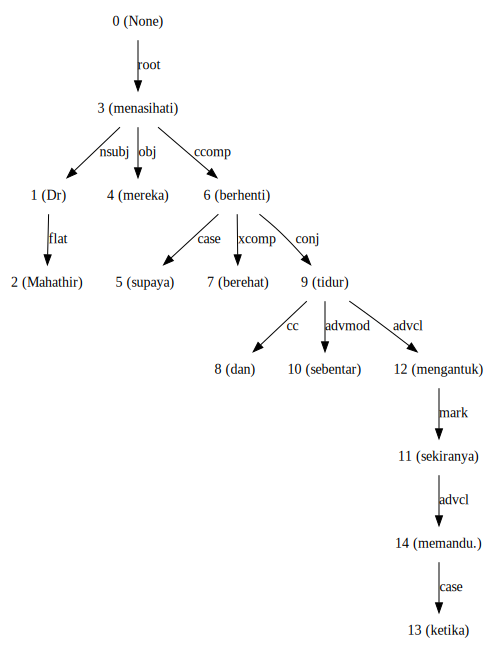

In [14]:
d_object, tagging, indexing = quantized_model.predict(string)
d_object.to_graphvis()

### Voting stack model

INFO:root:running dependency/alxlnet using device /device:CPU:0


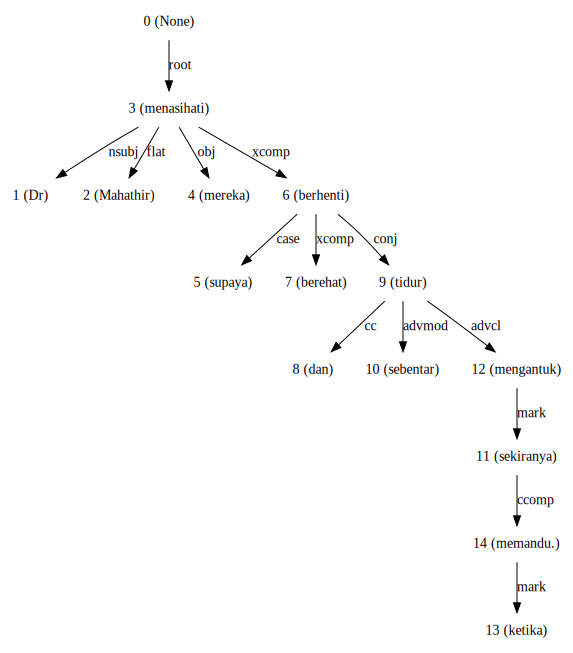

In [15]:
alxlnet = malaya.dependency.transformer(model = 'alxlnet')
tagging, indexing = malaya.stack.voting_stack([model, alxlnet, model], string)
malaya.dependency.dependency_graph(tagging, indexing).to_graphvis()

### Harder example

In [16]:
# https://www.astroawani.com/berita-malaysia/terbaik-tun-kita-geng-najib-razak-puji-tun-m-297884

s = "Najib yang juga Ahli Parlimen Pekan memuji sikap Ahli Parlimen Langkawi itu yang mengaku bersalah selepas melanggar SOP kerana tidak mengambil suhu badan ketika masuk ke sebuah surau di Langkawi pada Sabtu lalu"

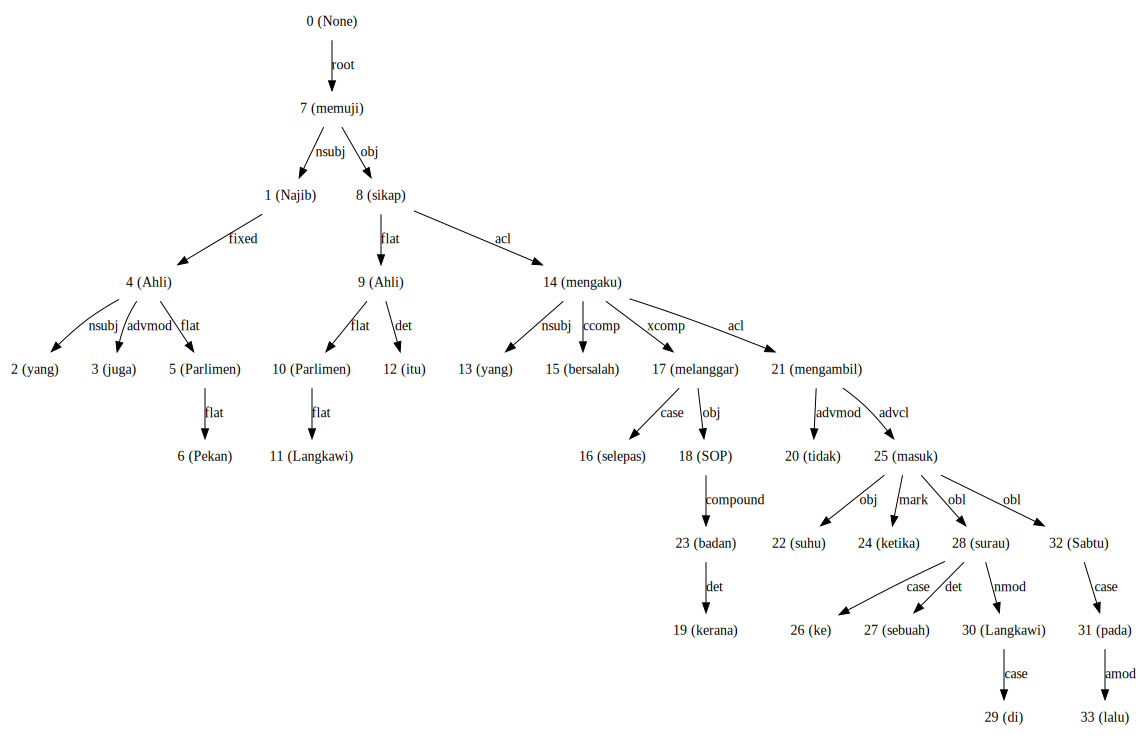

In [17]:
tagging, indexing = malaya.stack.voting_stack([model, alxlnet, model], s)
malaya.dependency.dependency_graph(tagging, indexing).to_graphvis()

### Dependency graph object

To initiate a dependency graph from dependency models, you need to call `malaya.dependency.dependency_graph`.

In [18]:
graph = malaya.dependency.dependency_graph(tagging, indexing)
graph

#### generate graphvis

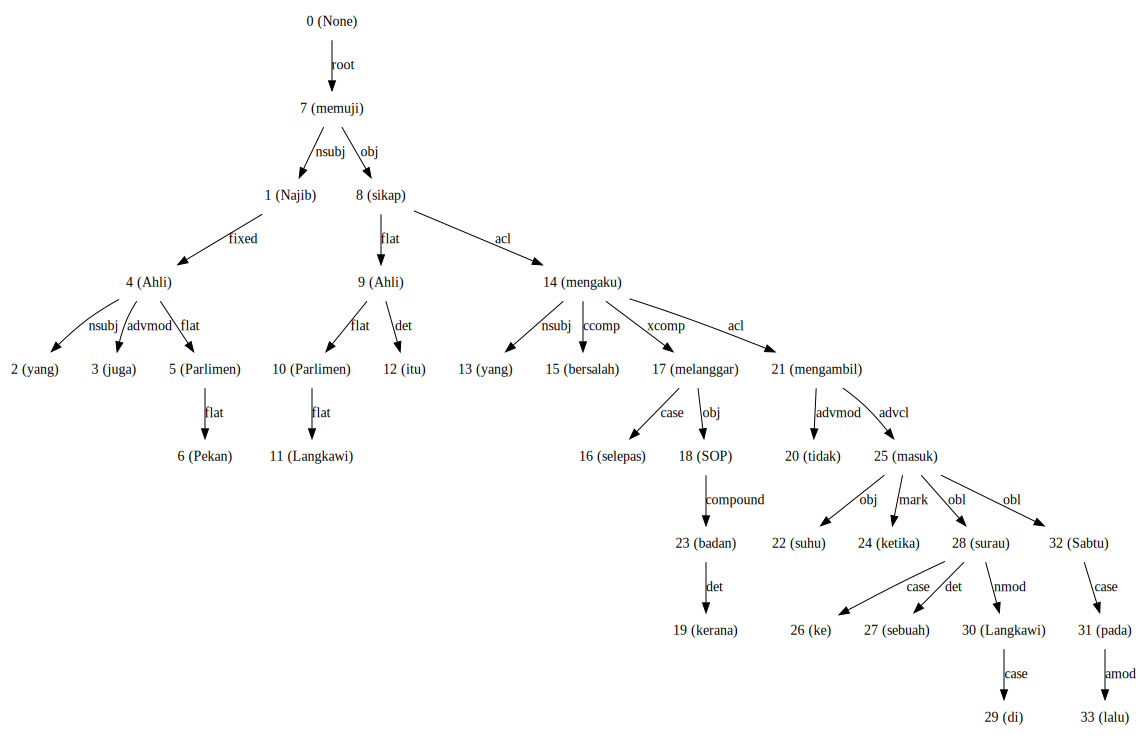

In [20]:
graph.to_graphvis()

#### Get nodes

In [21]:
graph.nodes

defaultdict(<function malaya.function.parse_dependency.DependencyGraph.__init__.<locals>.<lambda>()>,
            {0: {'address': 0,
              'word': None,
              'lemma': None,
              'ctag': 'TOP',
              'tag': 'TOP',
              'feats': None,
              'head': None,
              'deps': defaultdict(list, {'root': [7]}),
              'rel': None},
             1: {'address': 1,
              'word': 'Najib',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 7,
              'deps': defaultdict(list, {'fixed': [4]}),
              'rel': 'nsubj'},
             7: {'address': 7,
              'word': 'memuji',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 0,
              'deps': defaultdict(list, {'nsubj': [1], 'obj': [8]}),
              'rel': 'root'},
             2: {'address': 2,
 

#### Flat the graph

In [22]:
list(graph.triples())

[(('memuji', '_'), 'nsubj', ('Najib', '_')),
 (('Najib', '_'), 'fixed', ('Ahli', '_')),
 (('Ahli', '_'), 'nsubj', ('yang', '_')),
 (('Ahli', '_'), 'advmod', ('juga', '_')),
 (('Ahli', '_'), 'flat', ('Parlimen', '_')),
 (('Parlimen', '_'), 'flat', ('Pekan', '_')),
 (('memuji', '_'), 'obj', ('sikap', '_')),
 (('sikap', '_'), 'flat', ('Ahli', '_')),
 (('Ahli', '_'), 'flat', ('Parlimen', '_')),
 (('Parlimen', '_'), 'flat', ('Langkawi', '_')),
 (('Ahli', '_'), 'det', ('itu', '_')),
 (('sikap', '_'), 'acl', ('mengaku', '_')),
 (('mengaku', '_'), 'nsubj', ('yang', '_')),
 (('mengaku', '_'), 'ccomp', ('bersalah', '_')),
 (('mengaku', '_'), 'xcomp', ('melanggar', '_')),
 (('melanggar', '_'), 'case', ('selepas', '_')),
 (('melanggar', '_'), 'obj', ('SOP', '_')),
 (('SOP', '_'), 'compound', ('badan', '_')),
 (('badan', '_'), 'det', ('kerana', '_')),
 (('mengaku', '_'), 'acl', ('mengambil', '_')),
 (('mengambil', '_'), 'advmod', ('tidak', '_')),
 (('mengambil', '_'), 'advcl', ('masuk', '_')),
 (('

#### Check the graph contains cycles

In [23]:
graph.contains_cycle()

False

#### Generate networkx

Make sure you already installed networkx, 

```bash
pip install networkx
```

In [24]:
digraph = graph.to_networkx()
digraph

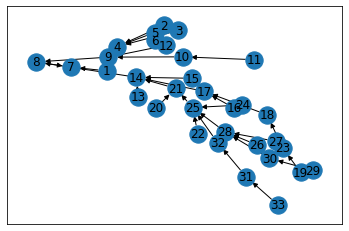

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw_networkx(digraph)
plt.show()

In [26]:
digraph.edges()

OutMultiEdgeDataView([(1, 7), (2, 4), (3, 4), (4, 1), (5, 4), (6, 5), (8, 7), (9, 8), (10, 9), (11, 10), (12, 9), (13, 14), (14, 8), (15, 14), (16, 17), (17, 14), (18, 17), (19, 23), (20, 21), (21, 14), (22, 25), (23, 18), (24, 25), (25, 21), (26, 28), (27, 28), (28, 25), (29, 30), (30, 28), (31, 32), (32, 25), (33, 31)])

In [27]:
digraph.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [28]:
labels = {i:graph.get_by_address(i)['word'] for i in digraph.nodes()}
labels

{1: 'Najib',
 2: 'yang',
 3: 'juga',
 4: 'Ahli',
 5: 'Parlimen',
 6: 'Pekan',
 7: 'memuji',
 8: 'sikap',
 9: 'Ahli',
 10: 'Parlimen',
 11: 'Langkawi',
 12: 'itu',
 13: 'yang',
 14: 'mengaku',
 15: 'bersalah',
 16: 'selepas',
 17: 'melanggar',
 18: 'SOP',
 19: 'kerana',
 20: 'tidak',
 21: 'mengambil',
 22: 'suhu',
 23: 'badan',
 24: 'ketika',
 25: 'masuk',
 26: 'ke',
 27: 'sebuah',
 28: 'surau',
 29: 'di',
 30: 'Langkawi',
 31: 'pada',
 32: 'Sabtu',
 33: 'lalu'}

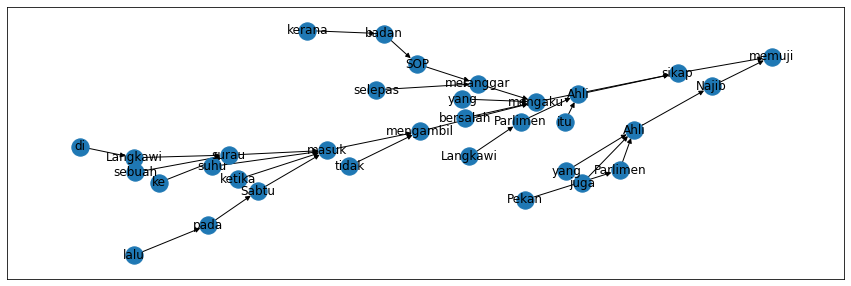

In [29]:
plt.figure(figsize=(15,5))
nx.draw_networkx(digraph,labels=labels)
plt.show()

### Vectorize

Let say you want to visualize word level in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, string: str):
    """
    vectorize a string.

    Parameters
    ----------
    string: List[str]

    Returns
    -------
    result: np.array
    """
```

In [42]:
r = quantized_model.vectorize(s)

In [43]:
x = [i[0] for i in r]
y = [i[1] for i in r]

In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(y)
tsne.shape

(33, 2)

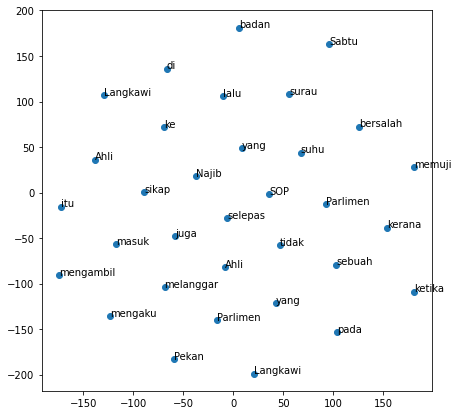

In [45]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = x
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )